# 2. Cancer overview

## 2.1 Environment setup

In [1]:
# Load necessary packages for data manipulation, visualization, and processing
library(tidyverse)
library(ggsci)
library(ggpubr)
library(ggrepel)
library(sf)
library(flextable)
source('tools.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to GEOS 3.12.0, GDAL 3.7.1, PROJ 9.3.0; sf_use_s2() is TRUE


Attaching package: ‘flextable’


The following objects are masked from ‘package:ggpubr’:

    border, font, rotate


The following object is masked from ‘package:purrr’:

    compose


Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.gith

## 2.2 Load data

In [2]:
# Read the CSV file containing cancer deaths by age data
age <- read_csv('data/cancer-deaths-by-age.csv')

Rows: 558 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, Age group, Rate, Lower interval, Upper interval
dbl (4): Year, agegrpid, Number, Pop count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 2.3 Age distribution

In [3]:
# Read the CSV file containing cancer incidence data
incidence <- read_csv("data/clean/incidence.csv")

Rows: 6300 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): DHB, sex, cancer
dbl (3): year, incidence_num, incidence_rate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Process the age data:
# - Replace 'S' in the Rate column with '0' and convert it to numeric
# - Categorize age groups into 'child' and 'adult'
# - Group by 'population' and 'Year' columns
# - Sum up the number of incidences for each group
# - Reshape the data to have a wider format
# - Display the data in a table format

age %>% 
  mutate(Rate = as.numeric(str_replace(Rate,"S","0"))) %>%
  # filter(Number > 5) %>%
  mutate(population = ifelse(agegrpid <= 3, "child",'adult')) %>%
  group_by(population,Year) %>%
  summarize(`Incidence number` = as.integer(sum(Number))) %>%
  pivot_wider(names_from = Year,values_from = `Incidence number`) %>%
  rempsyc::nice_table(title="Table 1: Number of New Registered Cancers")

`summarise()` has grouped output by 'population'. You can override using the
`.groups` argument.


a flextable object.
col_keys: `population`, `2011`, `2012`, `2013`, `2014`, `2015`, `2016`, `2017`, `2018`, `2019`, `2020` 
header has 2 row(s) 
body has 2 row(s) 
original dataset sample: 
  population  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020
1      adult 26572 26577 27075 27642 28755 28458 28807 29351 29205 30199
2      child    32    54    36    54    42    42    32    40    36    38

## 2.4 Gender variance of cancer types

Rows: 6300 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): DHB, sex, cancer
dbl (3): year, incidence_num, incidence_rate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 6300 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): DHB, sex, cancer
dbl (3): year, mortality_num, mortality_rate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(rate_name)

  # Now:
  data %>% select(all_of(rate_name))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”
`summarise()` 

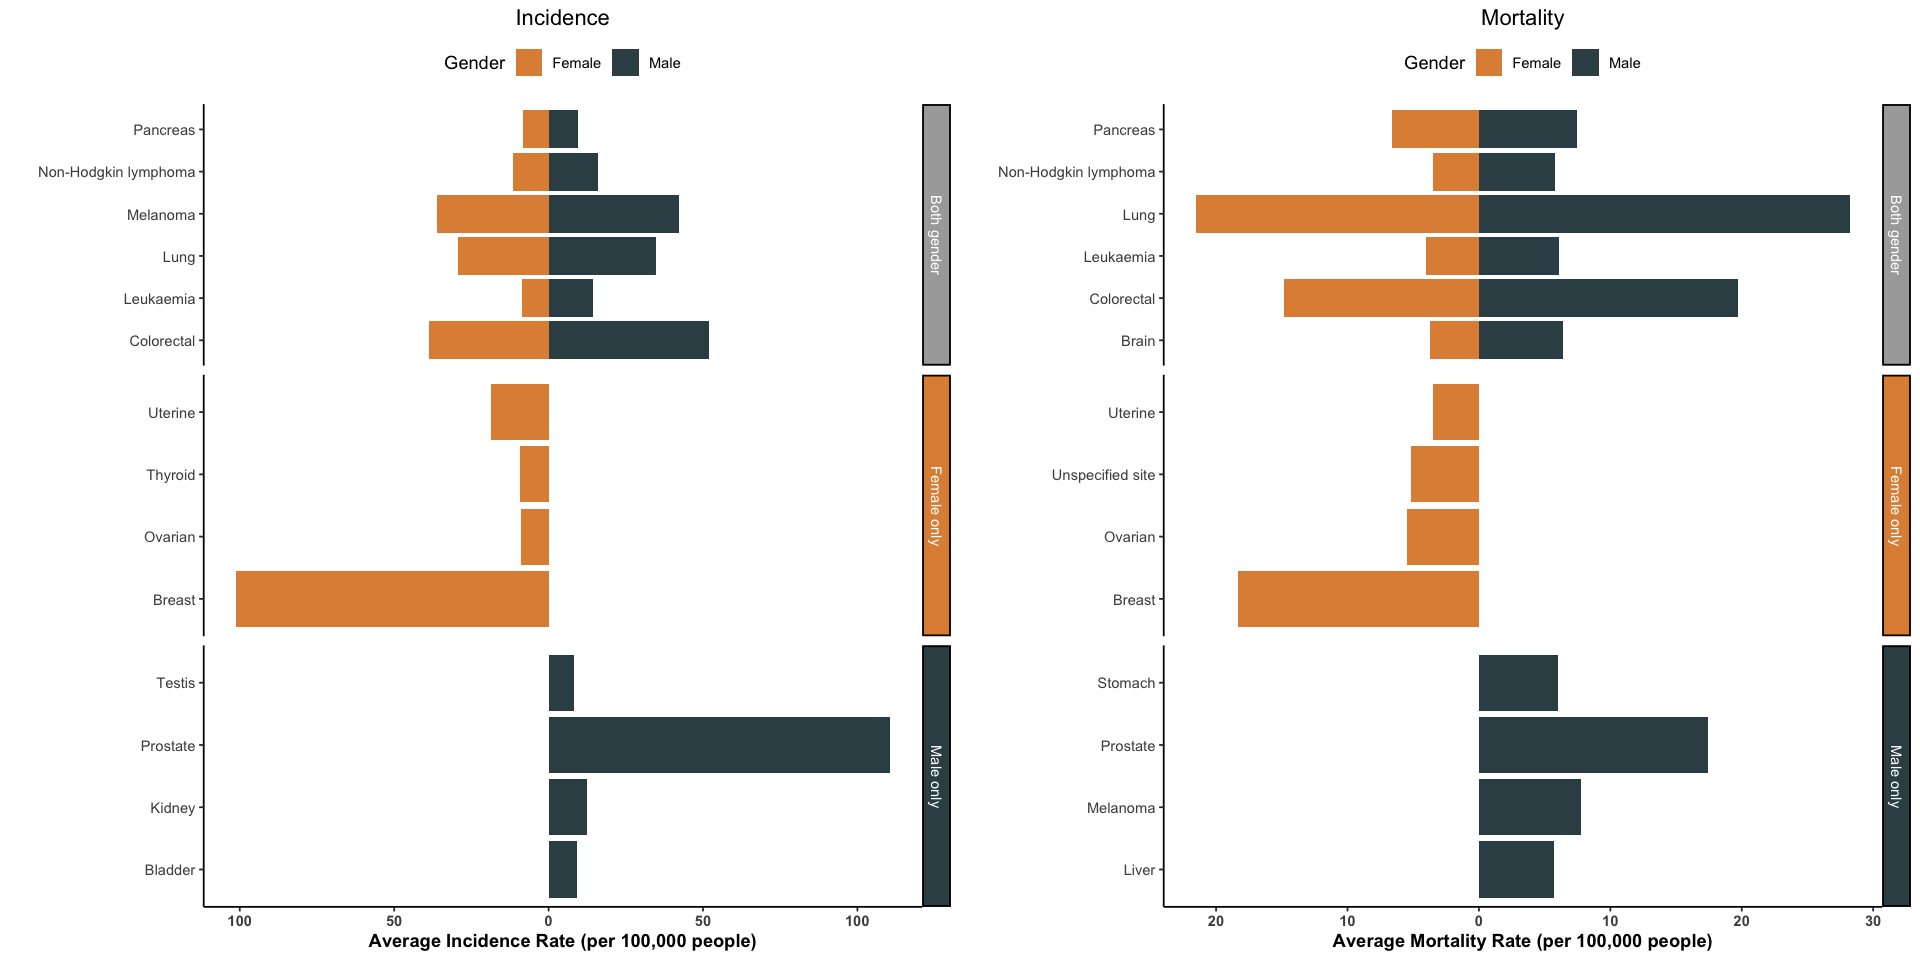

In [5]:
incidence <- read_csv("data/clean/incidence.csv")
mortality <- read_csv('data/clean/mortality.csv')

# Use the custom function 'draw_sex_variance' to create plots showing gender variance for incidence and mortality
g1 =  draw_sex_variance(incidence,type="Incidence",fulltitle=FALSE)
g2 = draw_sex_variance(mortality,type="Mortality",fulltitle=FALSE)

# Arrange the two plots side by side

options(repr.plot.width=16, repr.plot.height=8)
ggarrange(g1,g2)

## 2.5 Regional distribution

Rows: 2940 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): DHB, sex, cancer, group
dbl (3): year, incidence_num, incidence_rate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2940 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): DHB, sex, cancer, group
dbl (3): year, mortality_num, mortality_rate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'DHB'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'DHB'. You can override using the `.groups`
argument.


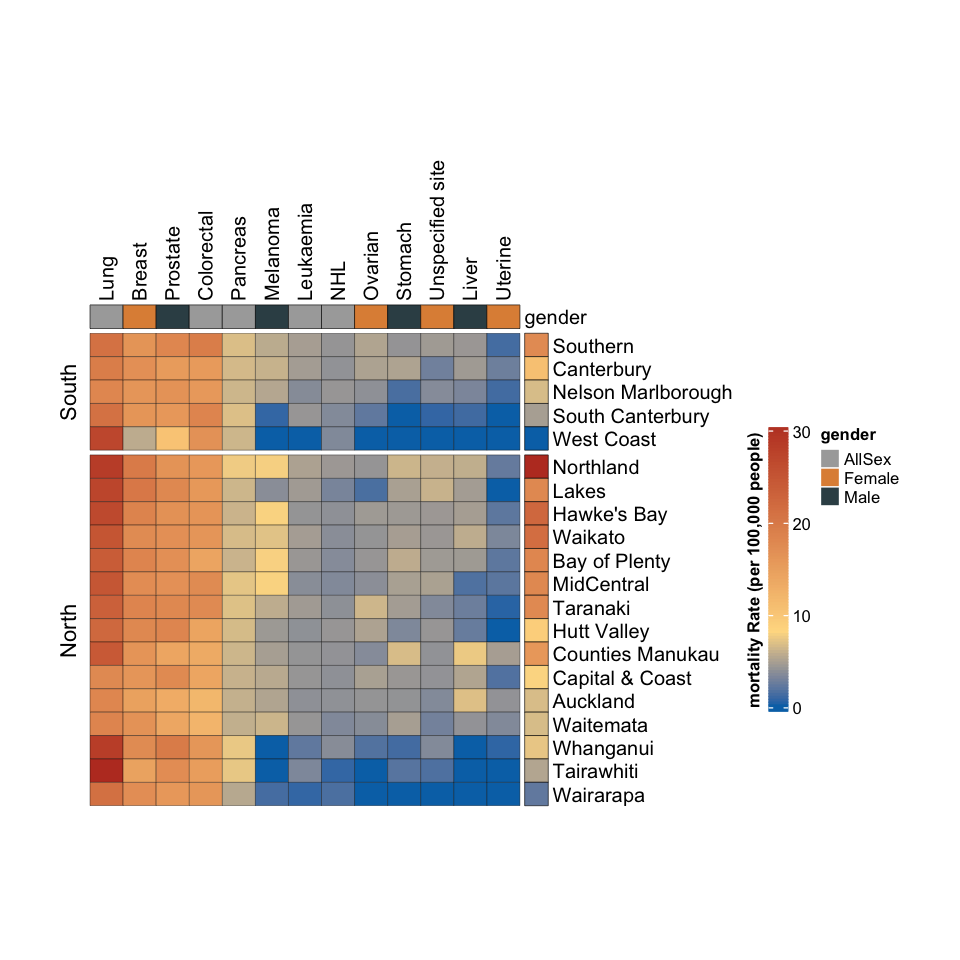

In [6]:
# Read incidence and mortality data filtered by sex
incidence_sexfiltered <- read_csv("data/clean/incidence_sexfiltered.csv")
mortality_sexfiltered <- read_csv('data/clean/mortality_sexfiltered.csv')

# Use the custom function 'regional_heatmap' to create heatmaps for incidence and mortality
ht_incidence = regional_heatmap(incidence_sexfiltered,type='Incidence')
draw(ht_incidence, heatmap_legend_side = "right",annotation_legend_side="right",legend_grouping = "original")

ht_mortality = regional_heatmap(mortality_sexfiltered,type='mortality')
options(repr.plot.width=8, repr.plot.height=8)
draw(ht_mortality, heatmap_legend_side = "right",annotation_legend_side="right",legend_grouping = "original")

## 2.6 Most common region for each cancer

Rows: 2940 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): DHB, sex, cancer, group
dbl (3): year, incidence_num, incidence_rate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2940 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): DHB, sex, cancer, group
dbl (3): year, mortality_num, mortality_rate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'DHB'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'DHB'. You can override using the `.groups`
argument.
Joining with `by = join_by(DHB)`
Joining with `by = join_by(DHB)`
Coordinate system already present. Adding new coordi

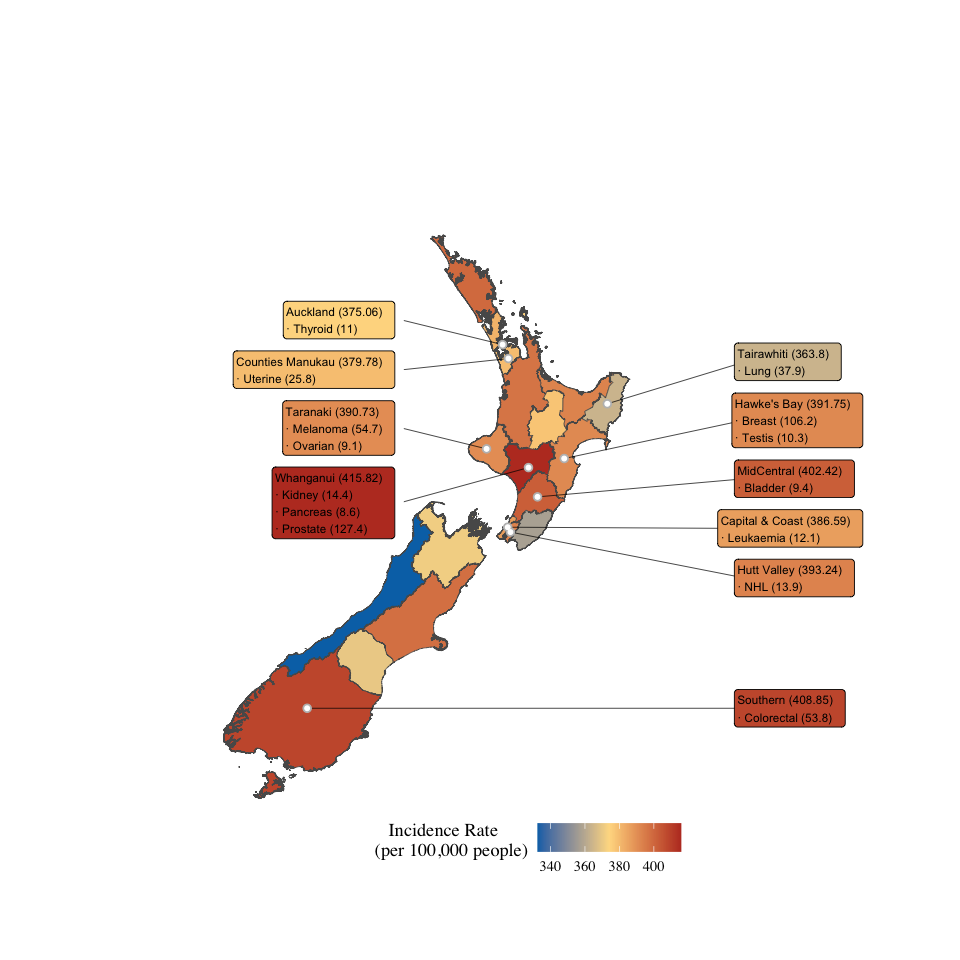

In [7]:
# Read the map data of New Zealand District Health Board boundaries
library(sf)
incidence_sexfiltered <- read_csv("data/clean/incidence_sexfiltered.csv")
mortality_sexfiltered <- read_csv('data/clean/mortality_sexfiltered.csv')
DHB_map <- st_read("data/NZ_District_Health_Board_boundaries_-_generalised.kml", quiet=TRUE)

# Use the custom function 'cancer_region_map' to create maps showing the most common regions for each cancer type for incidence and mortality
ggmap_incidence <- cancer_region_map(data = incidence_sexfiltered , type ="Incidence",map = DHB_map)
ggmap_incidence

# ggmap_mortality <- cancer_region_map(data = mortality_sexfiltered , type ="Mortality",map = DHB_map)
# ggmap_mortality

## 2.7 Time changes

Rows: 2940 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): DHB, sex, cancer, group
dbl (3): year, incidence_num, incidence_rate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2940 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): DHB, sex, cancer, group
dbl (3): year, mortality_num, mortality_rate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'DHB', 'cancer'. You can override using the
`.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, rem

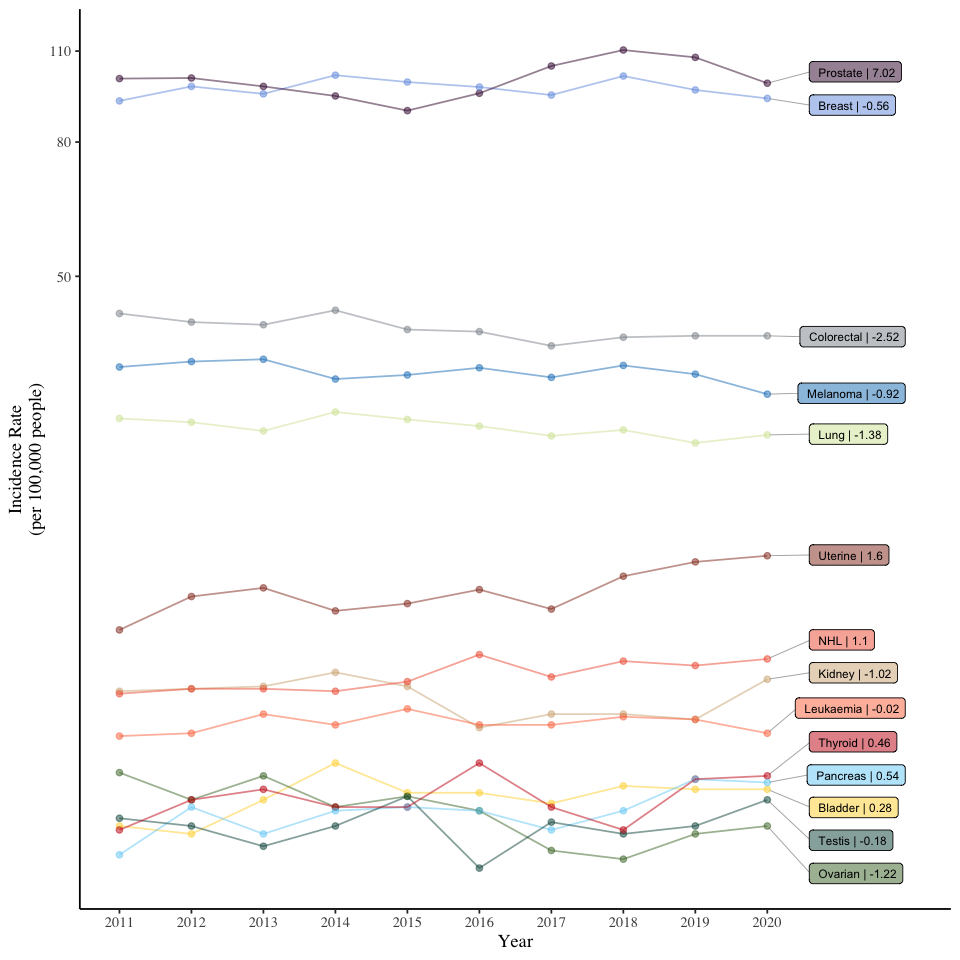

In [8]:
# Read incidence and mortality data filtered by sex
incidence_sexfiltered <- read_csv("data/clean/incidence_sexfiltered.csv")
mortality_sexfiltered <- read_csv('data/clean/mortality_sexfiltered.csv')

# Use the custom function 'time_change_plot' to create a plot showing the change in cancer rates over time
# The label number is calculated as the difference between the mean rates of 2016-2020 and 2011-2015
gg_time <- time_change_plot(data = incidence_sexfiltered, type = "Incidence",label.size = 2.5)
gg_time 